In [140]:
#Imports
import pandas as pd
import altair as alt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
testClean = data
testClean["job"] = testClean["job"].replace(['unknown'], "admin.")
testClean["marital"] = testClean["marital"].replace(['unknown'], "married")
testClean["education"] = testClean["education"].replace(['unknown'], "university.degree")
testClean["default"] = testClean["default"].replace(['unknown'], "no")
testClean["housing"] = testClean["housing"].replace(['unknown'], "yes")
testClean["loan"] = testClean["loan"].replace(['unknown'], "no")
testClean['poutcome_clean'] = testClean['poutcome'].apply(lambda x: 0 if x == 'nonexistent' or x == 'failure' else 1)
testClean['pdays_clean'] = testClean['pdays'].apply(lambda x: np.nan if x == 999 else x)
#testClean = testClean[~testClean['pdays_clean'].isna()]
#testClean["pdays"] = testClean["pdays"].astype(np.int64).replace([999], np.nan)
#testClean["pdays"].astype("Int64")
#testClean["poutcome"] = testClean["poutcome"].replace(['nonexistent'], np.nan)
testClean.head()
testClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

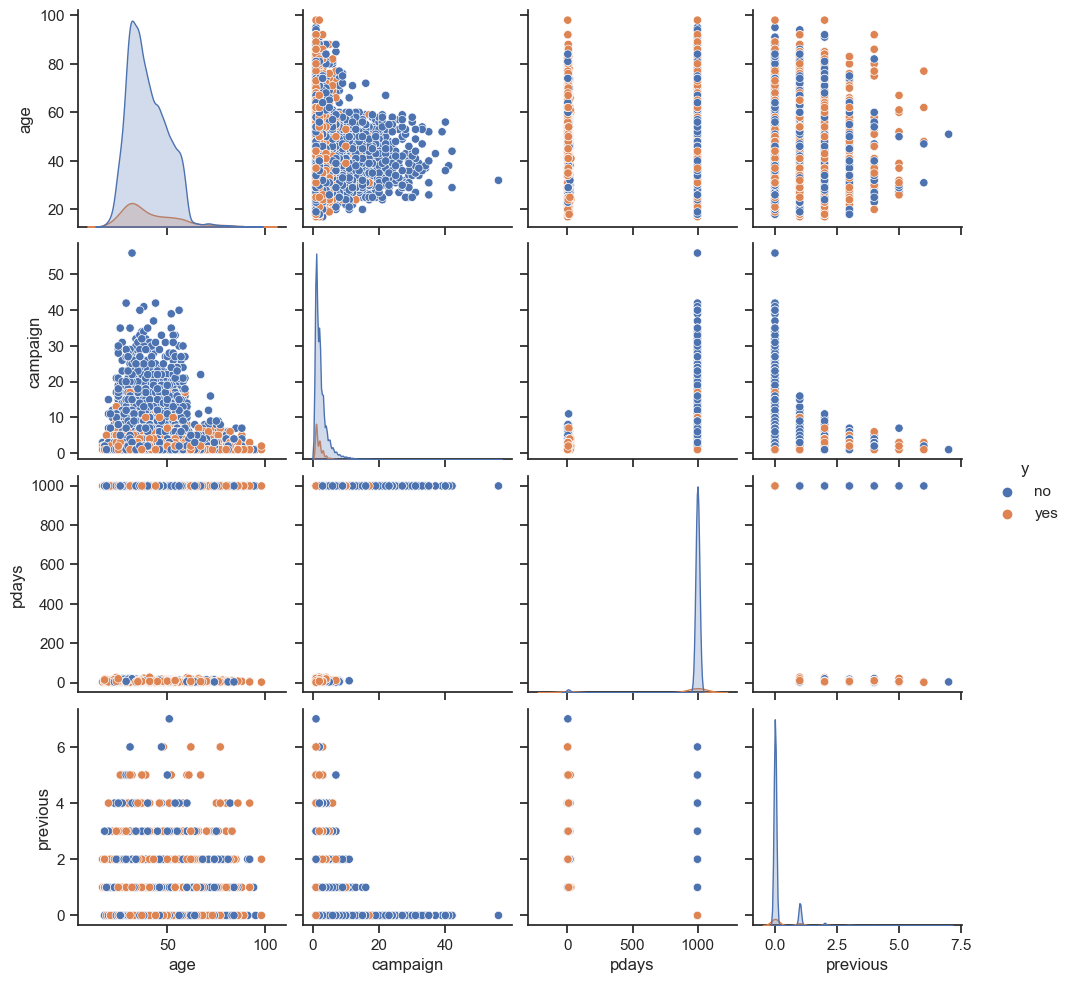

In [154]:
#used this to see data types
#testClean["education"].value_counts()

#used to see correlation with all data
#sns.pairplot(testClean, hue="y")

#selecting columns to use age to previous
CL = testClean.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,19]]

#used to see correlation with selected data
sns.pairplot(CL, hue="y")

In [163]:
#creating a a training and testing set
X = testClean.iloc[:,0:5]
y = testClean['y']

#creating a training and testing set
#get_dummies
X = pd.get_dummies(X)
y = pd.get_dummies(y)

#trying a 70/30 split for training and validation and a 15% test set
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.15, random_state=42)

#n_neighbors=3

#all: 88.3%
#0-5: 85.0%
#0-9 : 87.6%
#0-12 : 88.3%
#6-10: 84.3%
#9-13: 89.0%
#9-11: 83.0%
#9-15: 86.1%
#11-15: 88.7%
#16-18: 88.4%
#11-18: 88.6%

#n_neighbors=4

#all: 85.1%
#0-5: 83.7%
#0-9 : 84.8%
#0-12 : 85.7%
#6-10: 86.6%
#9-13: 84.3%
#9-11: 76.5%
#9-15: 85.1%
#11-15: 87.5%
#16-18: 86.2%
#11-18: 86.4%

#n_neighbors=5

#all: 
#0-5: 87.2%
#0-9 : 87.7
#0-12 : 88.8%
#6-10: 88.0%
#9-13: 89.2%
#9-11: 88.4%
#9-15: 88.9%
#11-15: 89.2%
#16-18: 89.5%
#11-18: 89.1%

#---------------------------------------------- Precions ----------------------------------------------
#all:
#0-5: 
#0-9 : 
#0-12 : 
#6-10: 
#9-13: 
#9-11: 
#9-15: 
#11-15: 
#16-18: 
#11-18: 


In [166]:
#used to see correlation with selected data
def get_accuracy_neigh3(X_train, X_val, y_train, y_val):

    neigh = KNeighborsClassifier(n_neighbors=5)

    neigh.fit(X_train, y_train)

    y_predictions = neigh.predict(X_val)

    matrix = metrics.confusion_matrix(y_val.values.argmax(axis=1), y_predictions.argmax(axis=1))

    true_positives = matrix[0][0]
    false_positives = matrix[0][1]
    false_negative = matrix[1][0]

    print("accuracy_score")
    print((accuracy_score(y_val, y_predictions, normalize=True, sample_weight=None))*100)
    print("precision_score")
    print((true_positives / (true_positives + false_positives))*100)
    print("recall_score")
    print((true_positives / (true_positives + false_negative))*100)


get_accuracy_neigh3(X_train, X_val, y_train, y_val)


accuracy_score
87.01078908398561
precision_score
97.50898203592814
recall_score
88.86705959397511


In [168]:
feature_df = pd.DataFrame({'features':X.columns, 'importance':classifier.feature_importances_})

key_features_chart = (alt.Chart(feature_df).encode(
   x= alt.X("features", title = "Features", sort='-y'),
   y=  alt.Y("importance", title = "Importance")
).properties(width=1000,title="Home features by importance")
.mark_bar()
)

key_features_chart

NameError: name 'classifier' is not defined